In [1]:
import tweepy
import pandas as pd
pd.set_option('display.max_colwidth', None)
import warnings
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
warnings.filterwarnings('ignore')
auth = tweepy.OAuthHandler('QiaHUdmOL7x6AR1ezdV9ShWqw', 'CpDybBKlO3l6lh09daBcMRSHcZeSBC6Fxwa4CKcoYct7RRJyL0')
auth.set_access_token('943727575360245760-oNH0ANnTELN5MuCLsgagOJn1GzprFZH', 'dGEtWp2VAiA8vfTOa6oAajqbwyrf15qzq8rDiYQb3xA0q')
api = tweepy.API(auth)

In [2]:
# searching a user and the user's tweets

#cursor = tweepy.Cursor(api.user_timeline, id ='Potus', tweet_mode = 'extended').items(3)  #items is the number of tweets we want to see

#for i in cursor:
    # print(i) # displays in json format
    # print(i.full_text)  # displays tweets
    # print()
      

In [3]:
# using the twitter search to look up a keyword

# cursor = tweepy.Cursor(api.search_tweets, q="Ethereum", tweet_mode = 'extended').items(1) 

# for i in cursor:
#    print(i.full_text)

In [4]:
# print(dir(i))  # displays information contained in a single tweet such as... likes count, time of post, etc,

cursor = tweepy.Cursor(api.user_timeline, id ='Potus', tweet_mode = 'extended').items(1)  #items is the number of tweets we want to see
for i in cursor:
    print(dir(i))
    

Unexpected parameter: id


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [5]:
# Making a dataframe of 200 tweets posted by Joe Biden with likes count and time of post. 
number_of_tweets = 200
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline, id = 'Potus', tweet_mode ='extended').items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


In [6]:
df = pd.DataFrame({'tweets' : tweets, "likes" : likes, "time" : time})

In [7]:
df

,tweets,likes,time
0,No class gets to choose the world into which they graduate. But few classes enter at a point in history where they actually have a chance to change the trajectory of the country.\n\nWe face an inflection point today. And I’m confident the class of 2021 will meet the moment. https://t.co/sDFvvT3CKi,8783,2021-12-18 01:27:50+00:00
1,"Since I took office, nearly 6 million jobs have been created, over 200 million Americans are fully vaccinated, and unemployment claims are the lowest on average since 1969.\n \nThese things didn’t happen by accident — they’re because of the American Rescue Plan.",39832,2021-12-17 23:40:44+00:00
2,Every kid in America should be able to turn on the faucet and drink clean water.\n \nMy Bipartisan Infrastructure Law is going to make that a reality.,22624,2021-12-17 18:45:29+00:00
3,"In my first year in office, we’ve passed two of the most important pieces of economic legislation in decades.\n \nThe third is in its final stages — and I’m confident we’ll get it passed.",30555,2021-12-17 17:59:02+00:00
4,Tune in as I deliver remarks at South Carolina State University’s 2021 Fall Commencement Ceremony. https://t.co/FCfTwsZumy,4171,2021-12-17 15:26:42+00:00
...,...,...,...
195,To Lawrence – and every veteran out there – thank you for selfless service and sacrifice for our nation. We owe you a debt we can never fully repay. https://t.co/nUNR9Br2UX,13608,2021-11-21 16:00:18+00:00
196,"With the Bipartisan Infrastructure Law, we will once again have the best roads, bridges, ports, and airports.\n\nWe will lead the world into the 21st century with modern cars and trucks and transit systems.\n\nWe will be building and moving again.",18952,2021-11-21 15:11:30+00:00
197,"Congratulations to the Washington Spirit on winning your first-ever NWSL championship. Despite a year with no shortage of challenges, you’ve made the District and your country very proud.",28328,2021-11-20 22:45:36+00:00
198,Unions built the middle class in this country – and we couldn’t have gotten this infrastructure law done without them. https://t.co/5MjEZpNXM0,19959,2021-11-20 21:19:39+00:00


In [8]:
df = df[~df.tweets.str.contains('RT')]  # using the ~ not operator to get rid of retweets from dataframe

In [9]:
df
# only 7 retweets out of 200 tweets Joe!

,tweets,likes,time
0,No class gets to choose the world into which they graduate. But few classes enter at a point in history where they actually have a chance to change the trajectory of the country.\n\nWe face an inflection point today. And I’m confident the class of 2021 will meet the moment. https://t.co/sDFvvT3CKi,8783,2021-12-18 01:27:50+00:00
1,"Since I took office, nearly 6 million jobs have been created, over 200 million Americans are fully vaccinated, and unemployment claims are the lowest on average since 1969.\n \nThese things didn’t happen by accident — they’re because of the American Rescue Plan.",39832,2021-12-17 23:40:44+00:00
2,Every kid in America should be able to turn on the faucet and drink clean water.\n \nMy Bipartisan Infrastructure Law is going to make that a reality.,22624,2021-12-17 18:45:29+00:00
3,"In my first year in office, we’ve passed two of the most important pieces of economic legislation in decades.\n \nThe third is in its final stages — and I’m confident we’ll get it passed.",30555,2021-12-17 17:59:02+00:00
4,Tune in as I deliver remarks at South Carolina State University’s 2021 Fall Commencement Ceremony. https://t.co/FCfTwsZumy,4171,2021-12-17 15:26:42+00:00
...,...,...,...
195,To Lawrence – and every veteran out there – thank you for selfless service and sacrifice for our nation. We owe you a debt we can never fully repay. https://t.co/nUNR9Br2UX,13608,2021-11-21 16:00:18+00:00
196,"With the Bipartisan Infrastructure Law, we will once again have the best roads, bridges, ports, and airports.\n\nWe will lead the world into the 21st century with modern cars and trucks and transit systems.\n\nWe will be building and moving again.",18952,2021-11-21 15:11:30+00:00
197,"Congratulations to the Washington Spirit on winning your first-ever NWSL championship. Despite a year with no shortage of challenges, you’ve made the District and your country very proud.",28328,2021-11-20 22:45:36+00:00
198,Unions built the middle class in this country – and we couldn’t have gotten this infrastructure law done without them. https://t.co/5MjEZpNXM0,19959,2021-11-20 21:19:39+00:00


In [10]:
# Joe's 5 mostly liked tweets
mostlike = df.loc[df.likes.nlargest(5).index]
mostlike

,tweets,likes,time
40,The music world has lost an icon. \n\nThe music of Vicente Fernández created memories for millions. We send our condolences to his family and all those who loved him.\n\nVicente will be remembered for generations to come.,123215,2021-12-13 02:22:37+00:00
76,"Get your booster shot, folks.",100007,2021-12-07 21:11:16+00:00
166,From the Biden family to yours – Happy Thanksgiving. https://t.co/r0mhQtQS69,92556,2021-11-25 14:00:58+00:00
48,I am deeply troubled by reports of Kellogg’s plans to permanently replace striking workers. Permanently replacing striking workers is an existential attack on the union and its members’ jobs and livelihoods. I strongly support legislation that would ban that practice.,86699,2021-12-10 22:22:41+00:00
153,"Because of the actions we’ve taken, in the past three weeks, the number of containers sitting on docks is down 33% — and shipping prices are down 25%. Goods are moving quicker out of our ports and onto doorsteps and store shelves.",82279,2021-11-27 21:56:42+00:00


In [11]:
# Top 5 tweets (full text)
ind_lst = list(mostlike.index)
# print(type(ind_lst))
# print(ind_lst)
# print()
print("*" * 80)
print("5 mostly liked Tweets posted by President Biden")
print("*" * 80)

for i in ind_lst:
    print(mostlike.loc[i]['tweets'])
    print("-" * 80)

********************************************************************************
5 mostly liked Tweets posted by President Biden
********************************************************************************
The music world has lost an icon. 

The music of Vicente Fernández created memories for millions. We send our condolences to his family and all those who loved him.

Vicente will be remembered for generations to come.
--------------------------------------------------------------------------------
Get your booster shot, folks.
--------------------------------------------------------------------------------
From the Biden family to yours – Happy Thanksgiving. https://t.co/r0mhQtQS69
--------------------------------------------------------------------------------
I am deeply troubled by reports of Kellogg’s plans to permanently replace striking workers. Permanently replacing striking workers is an existential attack on the union and its members’ jobs and livelihoods. I strongly sup

In [12]:
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [13]:
lines = [re.sub(r'[^A-Za-z0-9]+','', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        if word != '':
            lines2.append(word)


In [14]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language = 'english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [15]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [16]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()

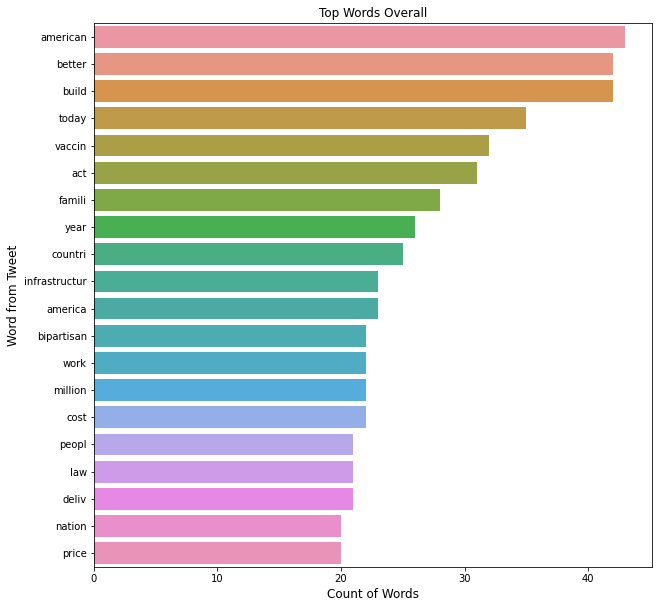

In [17]:
df2 = df2[:20,]
plt.figure(figsize = (10, 10))
sns.barplot(df2.values, df2.index, alpha = 1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize = 12)
plt.xlabel('Count of Words', fontsize = 12)
plt.show()

In [18]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [19]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()


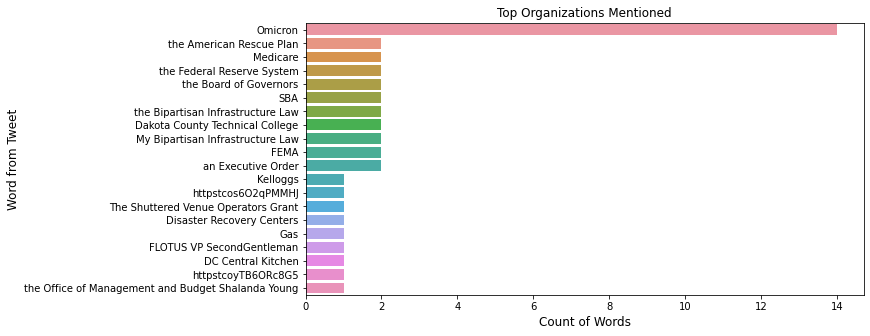

In [20]:
dfx = df7[:20,]
plt.figure(figsize = (10, 5))
sns.barplot(dfx.values, dfx.index, alpha = 1)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize = 12)
plt.xlabel('Count of Words', fontsize = 12)
plt.show()